In [60]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers

In [61]:
NUM_GESTURES = 8
RANDOM_SEED = 4
data_path = 'C:/Users/Diego Carasa/Desktop/TRABAJO IA/dataset/gesture_landmarks.csv'
model_path = 'C:/Users/Diego Carasa/Desktop/TRABAJO IA/dataset/gestures_classifier.hdf5'
tflite_save_path = 'C:/Users/Diego Carasa/Desktop/TRABAJO IA/dataset/gestures_classifier.tflite'

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
landmark_list = np.loadtxt(data_path, delimiter=',', dtype='float32', usecols=list(range(1, (21*2) + 1)))
gesture_id = np.loadtxt(data_path, delimiter=',', dtype='int32', usecols=(0))

x_train, x_test, y_train, y_test = train_test_split(
    landmark_list, gesture_id, test_size=0.20, random_state=RANDOM_SEED)


In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')
])

In [65]:
 model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

In [66]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

In [50]:
history=model.fit(
    x_train,
    y_train,
    epochs=500,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[stop_early]
)

Epoch 1/500
16/16 [==============================] - 1s 15ms/step - loss: 2.0119 - accuracy: 0.2533 - val_loss: 1.9317 - val_accuracy: 0.3648
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 1.8738 - accuracy: 0.3641 - val_loss: 1.7793 - val_accuracy: 0.4754
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 1.6981 - accuracy: 0.4533 - val_loss: 1.5618 - val_accuracy: 0.5656
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 1.4645 - accuracy: 0.5795 - val_loss: 1.3073 - val_accuracy: 0.6639
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 1.2067 - accuracy: 0.6421 - val_loss: 1.0737 - val_accuracy: 0.7295
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.9760 - accuracy: 0.6995 - val_loss: 0.8419 - val_accuracy: 0.7787
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7769 - accuracy: 0.7672 - val_loss: 0.7302 - val_accuracy: 0.7951
Epoch 8/500


In [45]:
val_loss, val_acc = model.evaluate(x_test, y_test, batch_size=100)

3/3 [==============================] - 0s 3ms/step - loss: 0.2382 - accuracy: 0.9385


In [10]:
model.save(model_path)

C:\anaconda\envs\tensorflow\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\DIEGOC~1\AppData\Local\Temp\tmp3mci0xfq\assets


INFO:tensorflow:Assets written to: C:\Users\DIEGOC~1\AppData\Local\Temp\tmp3mci0xfq\assets


9976

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(NUM_GESTURES), yticklabels=range(NUM_GESTURES))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

Epoch 1/500
16/16 [==============================] - 1s 15ms/step - loss: 2.0688 - accuracy: 0.2092 - val_loss: 1.8941 - val_accuracy: 0.3525
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 1.8063 - accuracy: 0.4390 - val_loss: 1.6922 - val_accuracy: 0.4426
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 1.5781 - accuracy: 0.5159 - val_loss: 1.4592 - val_accuracy: 0.4959
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 1.3236 - accuracy: 0.5918 - val_loss: 1.2150 - val_accuracy: 0.6639
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 1.0635 - accuracy: 0.7128 - val_loss: 0.9635 - val_accuracy: 0.7377
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.8289 - accuracy: 0.7662 - val_loss: 0.7656 - val_accuracy: 0.7664
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.7990 - val_loss: 0.6341 - val_accuracy: 0.8279
Epoch 8/500


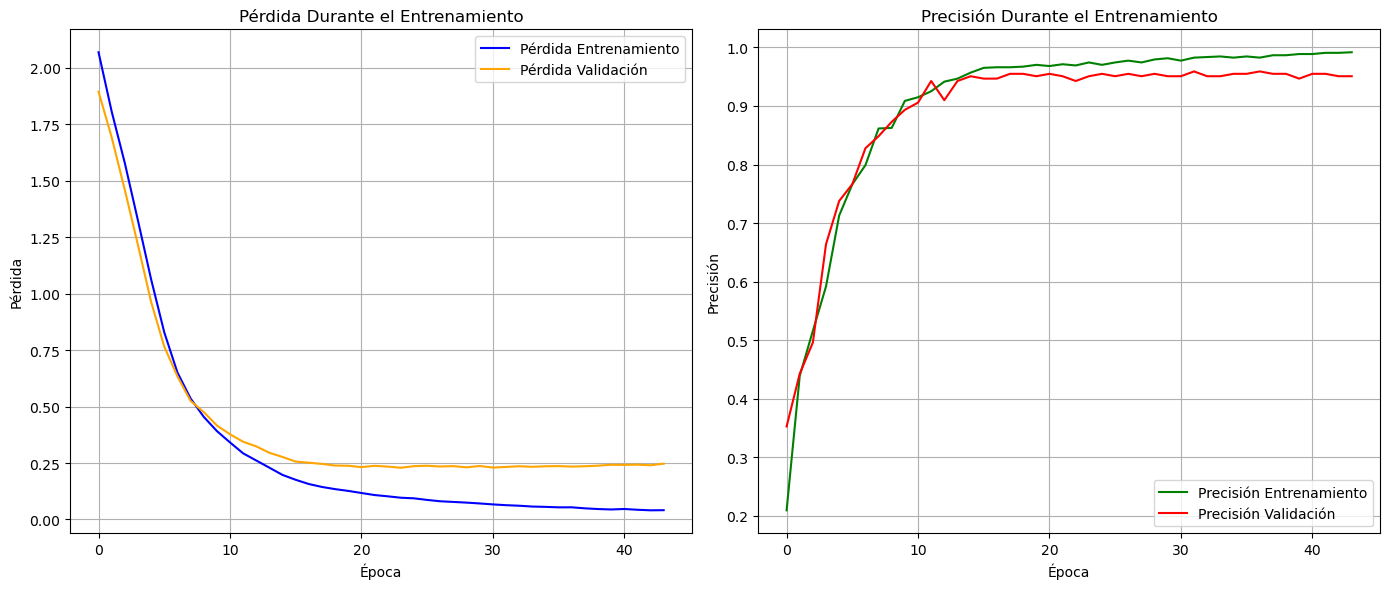

In [67]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def plot_training_history(history):
    # Graficar la pérdida (loss)
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida Entrenamiento', color='blue')
    plt.plot(history.history['val_loss'], label='Pérdida Validación', color='orange')
    plt.title('Pérdida Durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    # Graficar la precisión (accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Precisión Entrenamiento', color='green')
    plt.plot(history.history['val_accuracy'], label='Precisión Validación', color='red')
    plt.title('Precisión Durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)


stop_early = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    x_train_normalized,
    y_train,
    epochs=500,
    batch_size=64,
    validation_data=(x_test_normalized, y_test),
    callbacks=[stop_early]
)

val_loss, val_acc = model.evaluate(x_test_normalized, y_test, batch_size=64)
print(f'Pérdida de validación: {val_loss}')
print(f'Precisión de validación: {val_acc}')

plot_training_history(history)
